## 주성분분석

### PCA 클래스

In [6]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [10]:
pca.components_.shape

(50, 10000)

In [11]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [12]:
# 그림을 그려주는 코드

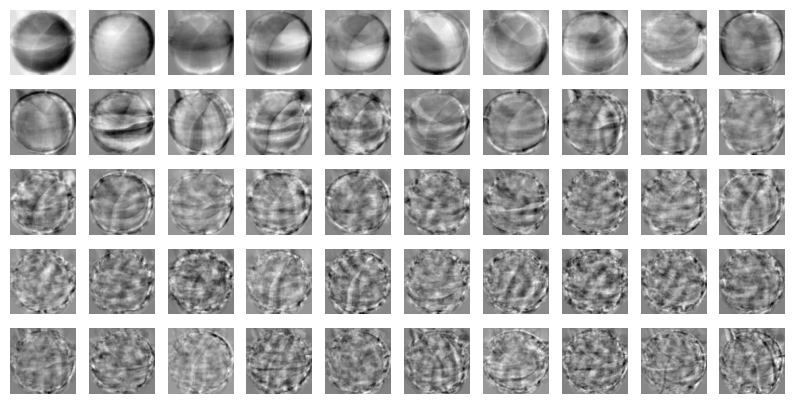

In [14]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [15]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

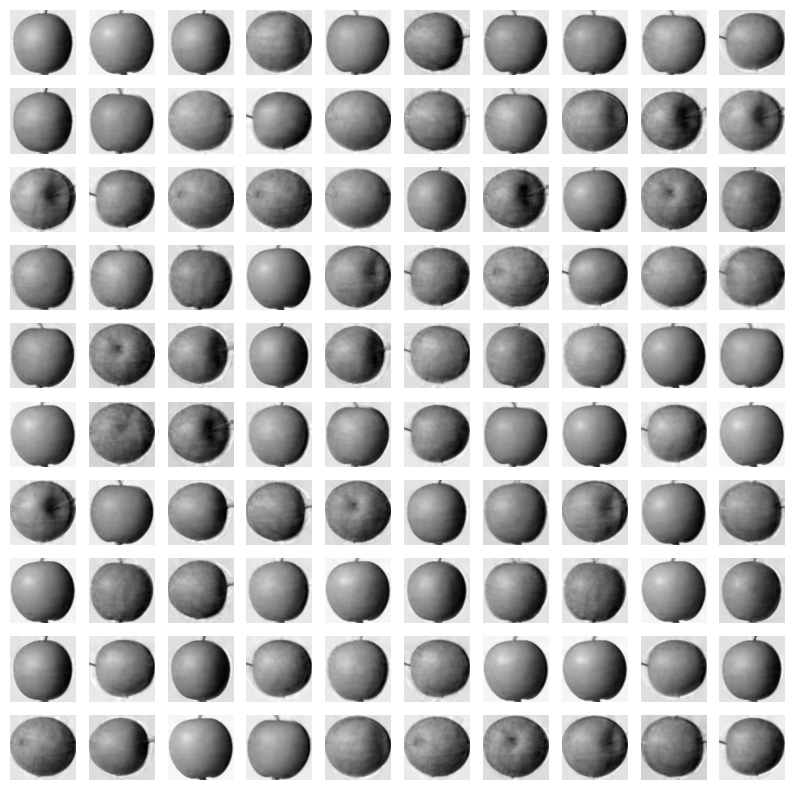

In [18]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [20]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215687803536218)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100+[1]*100+[2]*100)

In [22]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.18574762, 0.18840313, 0.18016076, 0.18873882, 0.20743871]), 'score_time': array([0.00353575, 0.00242496, 0.00248027, 0.00538635, 0.00252795]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.01168418, 0.0114181 , 0.00780582, 0.00834942, 0.01592636]), 'score_time': array([0.00080347, 0.00055647, 0.00053668, 0.00046468, 0.00050926]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [25]:
pca = PCA(n_components=0.5)  # 50%에 달하는 주성분 찾기
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [27]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [28]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.04498124, 0.02000952, 0.0163455 , 0.01107073, 0.02163863]),
 'score_time': array([0.00073385, 0.00050235, 0.00050712, 0.00044155, 0.00052023]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [35]:
km.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

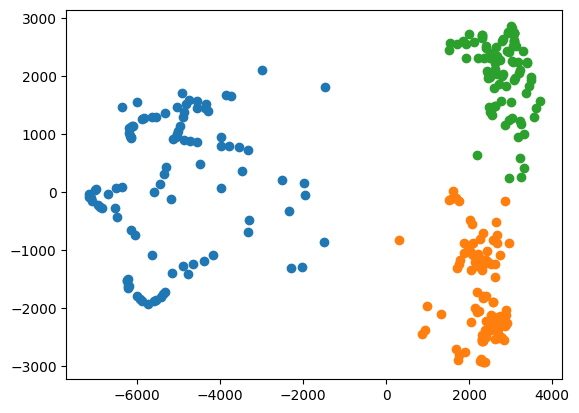

In [36]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])